In [2]:
# needed to show matplotlib plots inline
%matplotlib inline 

In [3]:
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [9]:
# Want to make wordclouds out of this instead of below
    # Could tap into wordcloud below by generating fake text file with appropriate numbers of each of the top words

# Load tfidf data frame
tfidf_df = pd.read_pickle('training_set.pkd')
tfidf_df

,veri,tast,head,flavor,chocol,hop,sweet,coffe,bourbon,pour,...,impress,ring,whiskey,forward,haze,gueuz,porter,live,without,grass
0,0.085018,0.134383,0.094616,0.093245,0.210931,0.001584,0.108329,0.411122,0.239766,0.108329,...,0.008562,0.013154,0.037058,0.010190,0.000000,0.000000,0.000000,0.036363,0.004230,0.000000
1,0.069454,0.121748,0.083345,0.109492,0.230858,0.004718,0.116029,0.525346,0.005495,0.082527,...,0.005102,0.005226,0.000000,0.012144,0.000000,0.000000,0.007396,0.013542,0.012603,0.000000
2,0.123519,0.125786,0.101988,0.130319,0.309495,0.002617,0.124653,0.037750,0.019052,0.100855,...,0.005896,0.009663,0.004375,0.003609,0.000000,0.000000,0.000000,0.011269,0.004661,0.000000
3,0.169520,0.178466,0.120002,0.129038,0.000709,0.386520,0.100031,0.000301,0.000304,0.135273,...,0.011849,0.005972,0.000000,0.012471,0.010674,0.000000,0.000409,0.040237,0.015332,0.022055
4,0.127483,0.125100,0.095315,0.119143,0.317917,0.002752,0.104846,0.037705,0.134209,0.096506,...,0.006199,0.015239,0.172489,0.008854,0.000000,0.000000,0.000000,0.014481,0.012251,0.000000
5,0.150245,0.132569,0.109694,0.102936,0.252149,0.005403,0.219389,0.087459,0.256972,0.102416,...,0.005410,0.009420,0.003011,0.006071,0.000000,0.000000,0.002353,0.017233,0.008553,0.000000
6,0.094499,0.136686,0.070874,0.104624,0.000000,0.120821,0.059062,0.000000,0.000000,0.075937,...,0.012293,0.003597,0.000000,0.017915,0.007035,0.000000,0.000000,0.022374,0.001735,0.000000
7,0.161940,0.158293,0.138051,0.110878,0.000286,0.388343,0.127473,0.000911,0.000920,0.107413,...,0.014233,0.007775,0.000352,0.007551,0.008363,0.000000,0.000413,0.027404,0.018377,0.010078
8,0.079713,0.143056,0.078289,0.094659,0.160867,0.001644,0.105335,0.539389,0.020342,0.064055,...,0.009629,0.009862,0.004122,0.012089,0.000000,0.000000,0.003221,0.013369,0.012441,0.000000
9,0.113605,0.102402,0.106381,0.113815,0.211352,0.005078,0.082298,0.637263,0.407703,0.097690,...,0.008499,0.015959,0.008489,0.007892,0.000582,0.000000,0.000948,0.008214,0.007214,0.000000


In [ ]:
##### Basic Wordclouds #####

In [5]:
##### 1. Read in raw review data. #####
path = '/Users/Drazi/Dropbox/beerwell_data/data/reviews/'

reviewList = []
for i in range(1,251):
    with open(path + 'reviews_' + str(i) + '.txt', 'r') as myfile:
        data=myfile.read().replace('\n', '')
    reviewList.append(data)

reviews = reviewList[0]

In [7]:
from wordcloud import WordCloud
wc = WordCloud().generate(reviewList[15])

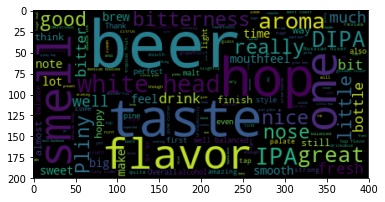

In [8]:
plt.imshow(wc, interpolation='bilinear')

In [ ]:
wc.to_file('test15.png')

In [ ]:
# Save a bunch of wordclouds
from wordcloud import WordCloud

for ind,review in zip(range(250),reviewList):
    wc = WordCloud().generate(review) 
    wc.to_file('Beer_' + str(ind) + '.png')